In [86]:
import numpy as np

from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs

# Generate sample data

In [90]:
#centers = [[1, 1], [-1, -1], [1, -1]]
#centers = [[1, 1], [-1, -1], [1, -1],[2, 2], [-2, -2], [2, -2]]
centers = [[1, 1], [-1, -1], [1, -1],[2, 2], [-2, -2], [2, -2],[3, 3], [-3, -3], [3, -3]]
#centers = [[1, 1], [-1, -1], [1, -1],[2, 2], [-2, -2], [2, -2],[3, 3], [-3, -3], [3, -3],[4, 4], [-4, -4], [4, -4]]
X, labels_true = make_blobs(
    n_samples=399, centers=centers, cluster_std=0.5, random_state=0
)

# Compute Affinity Propagation

In [91]:
af = AffinityPropagation(damping=0.9, preference=-200, random_state=0).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, labels, metric="sqeuclidean")
)

Estimated number of clusters: 4
Homogeneity: 0.528
Completeness: 0.846
V-measure: 0.651
Adjusted Rand Index: 0.423
Adjusted Mutual Information: 0.644
Silhouette Coefficient: 0.668


# Plot result

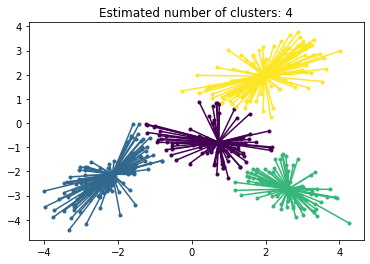

In [92]:
import matplotlib.pyplot as plt

plt.close("all")
plt.figure(1)
plt.clf()

colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, 4, 6)))

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.scatter(
        X[class_members, 0], X[class_members, 1], color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
    )
    for x in X[class_members]:
        plt.plot(
            [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
        )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()